# Quantity Analysis - Time Series

## Objective
Analyze and forecast **quantity trends** over time using time series analysis techniques.

## Dataset Overview
The dataset contains timestamped records of quantities sold or produced.

## Workflow
1. Load the data
2. Explore time-based patterns
3. Resample and smooth
4. Train a forecasting model
5. Visualize predictions

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# Load data from Excel file
df = pd.read_excel("Raw Data_Predictive Analysis xlsx.xlsx") 

# To load excel files in jupyter install openpyxl : "pip install openpyxl"

## Exploratory Data Analysis

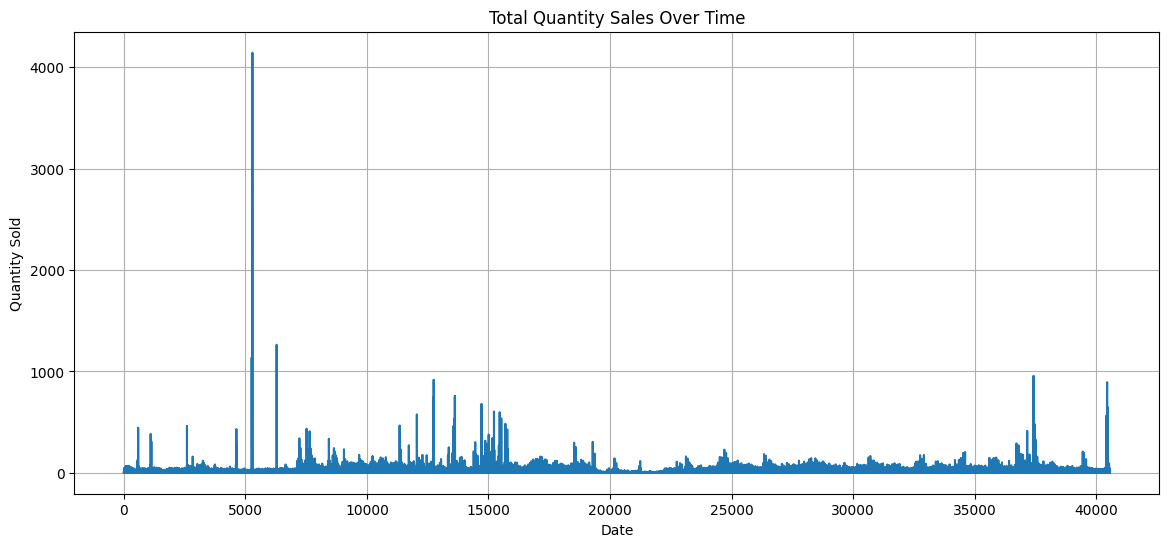

In [13]:
# Convert to datetime if necessary
df['OrderDate'] = pd.to_datetime(df['OrderDate'], dayfirst=True)

# Plot raw time series
plt.figure(figsize=(14,6))
df['total_qty_sales'].plot()
plt.title('Total Quantity Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.grid(True)
plt.show()


## Decomposition

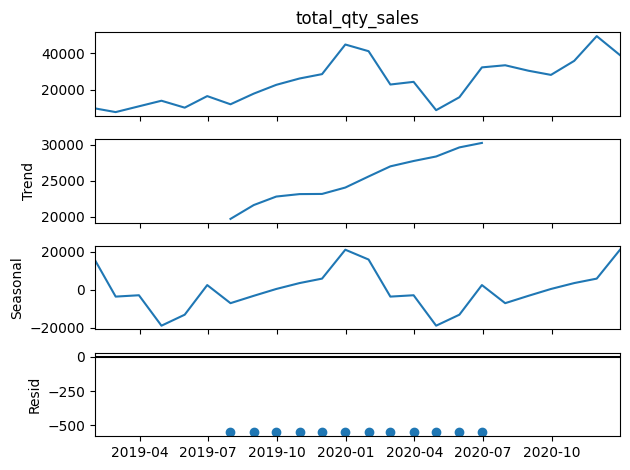

In [14]:
# Sort values by date
df = df.sort_values("OrderDate")

# Set date as index
df.set_index('OrderDate', inplace=True)


# Resample monthly sales
monthly_sales = df['total_qty_sales'].resample('M').sum()

# Decompose
decomposition = seasonal_decompose(monthly_sales, model='additive')

# Plot decomposition
decomposition.plot()
plt.tight_layout()
plt.show()


## Modeling with ARIMA

In [19]:
# Train-test split
train = monthly_sales[:-3]
test = monthly_sales[-3:]


# Fit ARIMA model
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()


# Forecast
forecast = model_fit.forecast(steps=len(test))

## Evaluation and Visualization

Mean Squared Error: 220624217.823375


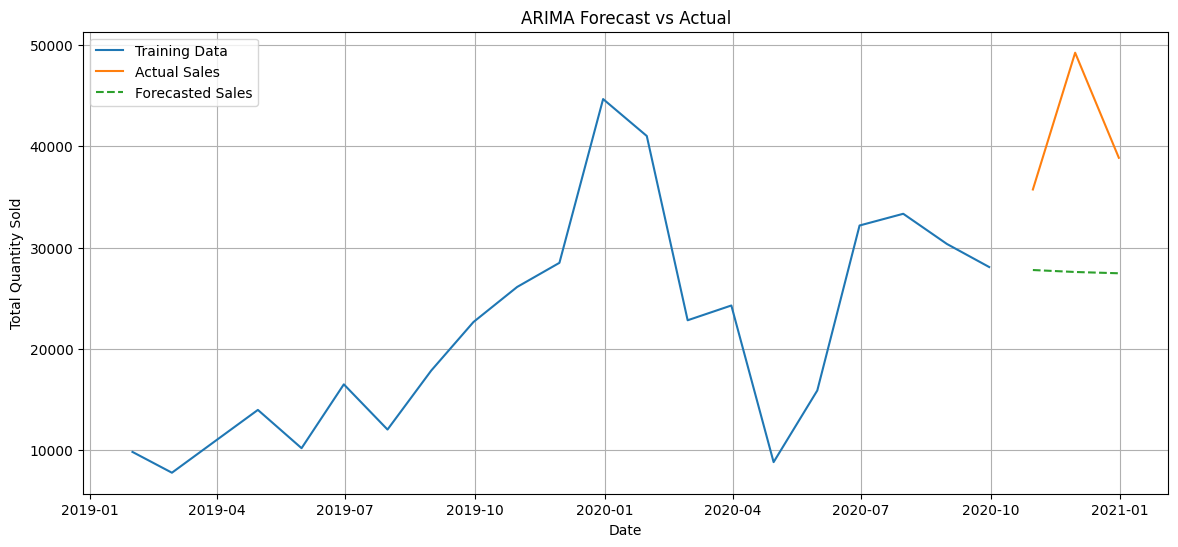

In [21]:
# Evaluation
mse = mean_squared_error(test, forecast)
print("Mean Squared Error:", mse)


# Plot forecast vs actual
plt.figure(figsize=(14,6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Sales')
plt.plot(test.index, forecast, label='Forecasted Sales', linestyle='--')
plt.title('ARIMA Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.legend()
plt.grid(True)
plt.show()


## Conclusion
- Time series modeling was applied to understand and forecast quantity trends.
- ARIMA provided a simple baseline.
- For improvement, consider SARIMA, Prophet, or LSTM for long-term patterns.